In [3]:
# Module 6 Final Project- Single & Multivariate Regression
# Infant Mortality and Social Determinants
# Esther Abend, Rob Gleich, and Catherine Park
# March 23, 2020

# Use OLS Regression to determine correlation between 

#import libraries for reading data and EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
chr_19 = pd.read_csv("analytic_data2019.csv", low_memory=False)

#drop second row of variable names
chr_19 = chr_19.drop([0])

# drop all metrics (numerator, denominator, and confidence interval) except raw values 
for i, col in enumerate(chr_19.columns):
    if i < 7: pass
    elif col[-5:] != 'value':
        chr_19 = chr_19.drop(columns = col)

# drop and rename location columns
chr_19 = chr_19.drop(columns = ['State FIPS Code', 'County FIPS Code', 'County Ranked (Yes=1/No=0)'])
chr_19 = chr_19.rename(columns={"5-digit FIPS Code": "fips", "Name": "county", "Release Year": "year"})

# remove the text 'raw values' from column names to make more readable
for col in chr_19:
    if col[-5:] == 'value':
        chr_19 = chr_19.rename(columns={col: col[:-10]})

# only keep rows that include infant mortality 
chr_19 = chr_19[chr_19['Infant mortality'].isna() == False]

# print ratio of NA's in each column
for col in chr_19.columns: print(col + ": " + str(chr_19[col].isna().sum() / len(chr_19[col])))
    
#drop variables with > 10% NaN
chr_19 = chr_19.loc[:, :'% Rural']
chr_19 = chr_19.drop(['Homicides', 
                      'Disconnected youth',
                      'Drinking water violations',
                      'Drug overdose deaths'], axis=1)

chr_19 = chr_19.drop(['fips', 'State Abbreviation', 'county', 'year'], axis=1)

chr_19 = chr_19.astype(float)

print("remaining counties: ", len(chr_19))
# drop 
chr_19 = chr_19.dropna()
print("final dataset dimensions: ", chr_19.shape)

#chr_19.to_csv('chr_2019_im.csv')
# Identify highly correlated variables

corr_df = chr_19.corr().abs()
s = corr_df.unstack()
so = s.sort_values(ascending=False, kind="quicksort")
sorted_correlations = so.drop_duplicates()

#print("Top 25 most highly correlated pairs:\n")
#print(sorted_correlations[1:26])

# drop redundant variables

chr_19 = chr_19.drop(['Uninsured adults', 
                     'Premature death', 
                     'Premature age-adjusted mortality', 
                     'Frequent mental distress', 
                     'Poor or fair health', 
                     'Frequent physical distress', 
                     'Food insecurity', 
                     'Poor mental health days', 
                     'Child mortality', 
                     'Children in poverty', 
                     '% not proficient in English', 
                     'Severe housing problems'], axis=1)

chr_19.shape

fips: 0.0
State Abbreviation: 0.0
county: 0.0
year: 0.0
Premature death: 0.0
Poor or fair health: 0.0007621951219512195
Poor physical health days: 0.0007621951219512195
Poor mental health days: 0.0007621951219512195
Low birthweight: 0.0
Adult smoking: 0.0007621951219512195
Adult obesity: 0.0
Food environment index: 0.0007621951219512195
Physical inactivity: 0.0
Access to exercise opportunities: 0.0
Excessive drinking: 0.0007621951219512195
Alcohol-impaired driving deaths: 0.0
Sexually transmitted infections: 0.0007621951219512195
Teen births: 0.0
Uninsured: 0.0
Primary care physicians: 0.0
Dentists: 0.0
Mental health providers: 0.0
Preventable hospital stays: 0.001524390243902439
Mammography screening: 0.001524390243902439
Flu vaccinations: 0.0007621951219512195
High school graduation: 0.001524390243902439
Some college: 0.0
Unemployment: 0.0
Children in poverty: 0.0
Income inequality: 0.0
Children in single-parent households: 0.0
Social associations: 0.0
Violent crime: 0.02820121951219

(1142, 56)

outlier: Bristol City, VA


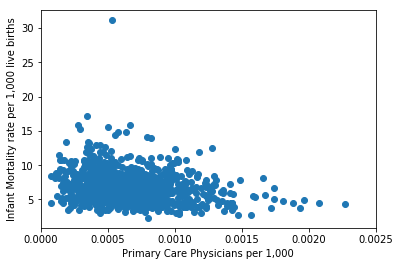

In [5]:
# set x, X, and y
y = chr_19['Infant mortality']
x = chr_19['Primary care physicians']
X = chr_19.drop(['Infant mortality'], axis=1)


print("outlier: Bristol City, VA")

# plot infant mortality ~ # of physicians 
plt.scatter(x, y)
plt.xlim(0, 0.0025)
plt.xlabel('Primary Care Physicians per 1,000')
plt.ylabel('Infant Mortality rate per 1,000 live births')
plt.show()

In [6]:
# single variable regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

#chr_19 = chr_19.astype(float)
x = x.to_numpy()
x = x.reshape(-1, 1)
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.046965550467101935

In [14]:
# identify r-squared for single parent households

x_chld = chr_19['Children in single-parent households']
x = x_chld.to_numpy()
x = x.reshape(-1, 1)
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.3635608426099517

In [7]:
# multiple regression

X_train, X_test, y_train, y_test = train_test_split(X, y)

linreg = LinearRegression()
linreg.fit(X, y)
print("beta coefficients:")
print(linreg.coef_)

linreg.score(X, y)

beta coefficients:
[ 1.37740005e-01  2.45313360e+01  3.15282432e+00 -2.62257452e+00
 -1.46129180e-02  9.19819190e-02 -4.38393908e-01 -3.51602030e+00
 -4.23754052e-01  2.31825312e-04 -3.30485177e-02 -8.06654985e+00
  1.39207500e+02 -6.61367378e+01 -7.32960545e+01  2.51545266e-05
 -1.14032511e-01  4.68491194e-01  4.37529698e-01 -9.00320598e-01
 -3.99798712e+00 -6.58951711e-04  4.21343316e+00  5.79330339e-02
 -4.03636655e-04 -1.39165457e-02 -2.58507132e-02 -6.72921307e-01
  3.20246650e-01 -3.80719204e-01 -5.92753052e-01 -7.20353015e-04
 -3.58095220e+00  1.73366029e-02 -3.94414549e+00  1.17761767e+01
 -5.06986973e+01 -1.07596176e-05  1.31431270e+00  1.13521691e-03
 -5.47065383e-03 -2.63088907e-02 -1.76888125e+00 -4.88470887e+00
  3.05013614e-09  6.44505929e+00  9.11456668e+00 -5.53414076e+00
 -7.88218759e+00 -1.02444530e+01  3.49717068e+00 -1.01961342e+01
 -9.68275523e+00 -1.50816969e+01 -6.97856338e-01]


0.5989230304116829

In [8]:
#Backward Elimination feature selection
from scipy.special import factorial
import statsmodels.api as sm

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Low birthweight', 'Excessive drinking', 'Teen births', 'Uninsured', 'Children in single-parent households', 'Social associations', 'Injury deaths', 'Life expectancy', 'HIV prevalence', 'Limited access to healthy foods', 'Uninsured children', 'Children eligible for free or reduced price lunch', '% 65 and older', '% Asian', '% Hispanic', '% Non-Hispanic white', '% Females']


In [11]:
#rerun model with remaining features

X_2 = chr_19[['Low birthweight', 'Excessive drinking', 
             'Teen births', 'Uninsured', 
             'Children in single-parent households', 
             'Social associations', 'Injury deaths', 
             'Life expectancy', 'HIV prevalence', 
             'Limited access to healthy foods', 'Uninsured children', 
             'Children eligible for free or reduced price lunch', 
             '% 65 and older', '% Asian', '% Hispanic', 
             '% Non-Hispanic white', '% Females']]

X_train, X_test, y_train, y_test = train_test_split(X_2, y)

linreg = LinearRegression()
linreg.fit(X_2, y)
print("r-squared:")
linreg.score(X_2, y)


r-squared:


0.5818022985761968

In [12]:
#print summary for final model

import statsmodels.api as sm

X2 = sm.add_constant(X_2)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       Infant mortality   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     97.82
Date:                Sat, 21 Mar 2020   Prob (F-statistic):          9.00e-200
Time:                        16:33:17   Log-Likelihood:                -2020.0
No. Observations:                1142   AIC:                             4074.
Df Residuals:                    1125   BIC:                             4160.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [22]:
from sklearn import metrics

y_pred = linreg.predict(X_test)


print(metrics.mean_absolute_error(y_test, y_pred))

print(metrics.mean_squared_error(y_test, y_pred))

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.9502116697455002
1.6484201423690863
1.2839081518430695


In [9]:
# Principle Components Analysis
from sklearn.preprocessing import StandardScaler

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(X)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00088968  0.51717922  0.73479287 ... -0.18207085  0.09941257
   0.38004377]
 [ 0.51717922  1.00088968  0.53389189 ... -0.41320108  0.37316954
   0.13247232]
 [ 0.73479287  0.53389189  1.00088968 ...  0.10644886  0.06019551
   0.4764304 ]
 ...
 [-0.18207085 -0.41320108  0.10644886 ...  1.00088968 -0.15885076
   0.32662151]
 [ 0.09941257  0.37316954  0.06019551 ... -0.15885076  1.00088968
  -0.11970517]
 [ 0.38004377  0.13247232  0.4764304  ...  0.32662151 -0.11970517
   1.00088968]]


In [10]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[-0.21111977 -0.18765376 -0.1977048  -0.1897872   0.19073891 -0.21487819
  0.17489695  0.17351589  0.01372049 -0.11845687 -0.21146112 -0.13740382
  0.12013333  0.13114799  0.06715134 -0.14911357  0.10374019  0.14088367
  0.05221519  0.20058172 -0.13762907 -0.10021029 -0.19792597 -0.06128477
 -0.11601168 -0.15803138 -0.04210061  0.02752225 -0.08645331  0.02698612
  0.22808883 -0.20810327 -0.05764456 -0.11195222 -0.20058144 -0.15204789
 -0.06344853  0.01368426  0.21234736 -0.19984361  0.0612093  -0.01202968
 -0.18783151  0.01637299  0.00589248  0.03041189 -0.04167553 -0.03866893
 -0.1414436  -0.05483592  0.12685208  0.02658148  0.02324227  0.07574513
 -0.03966646 -0.12625965]
Eigenvalue 1: 15.023778639512535
----------------------------------------
Eigenvector 2: 
[-0.01715947 -0.1132202   0.06330219  0.10908913  0.12463727  0.08081428
 -0.15236009  0.01504999  0.01212184 -0.25779437 -0.00321244 -0.04603596
 -0.15177535 -0.18229788 -0.16538648  0.03356356  0.04256401  0.0

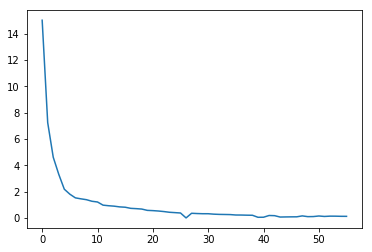

[1.50237786e+01 7.24323972e+00 4.61357396e+00 3.31187035e+00
 2.18286672e+00 1.80544198e+00 1.52490098e+00 1.45091904e+00
 1.38609898e+00 1.26585955e+00 1.21078523e+00 9.71032593e-01
 9.26933951e-01 8.94117694e-01 8.38416428e-01 8.13236409e-01
 7.28411098e-01 7.04885208e-01 6.73736670e-01 5.74587279e-01
 5.54776438e-01 5.25361104e-01 4.83520278e-01 4.29377711e-01
 4.02412133e-01 3.74597703e-01 6.18413360e-04 3.52945143e-01
 3.32940628e-01 3.19784347e-01 3.19127572e-01 2.85971435e-01
 2.68619584e-01 2.61699383e-01 2.53118115e-01 2.21574379e-01
 2.18872526e-01 2.07941056e-01 2.01776571e-01 4.81872442e-02
 5.29124892e-02 1.84625733e-01 1.71441080e-01 6.69687358e-02
 7.54015130e-02 8.16082878e-02 8.43857851e-02 1.53904666e-01
 9.74998435e-02 1.03615331e-01 1.46777599e-01 1.12278756e-01
 1.34833073e-01 1.32384257e-01 1.22715005e-01 1.20555669e-01]


In [11]:
# Take value of county 1 * -0.19.. + county 2 * -0.188 .... 

# print scree plot
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

In [12]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=8)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA:\n',
    100 * sklearn_pca.explained_variance_ratio_
)

print("total: " + str(100*sum(sklearn_pca.explained_variance_ratio_))[:5] + '%\n')


The percentage of total variance in the dataset explained by each component from Sklearn PCA:
 [26.80432887 12.92285943  8.23120097  5.90879407  3.89446135  3.22091581
  2.72023458  2.58840014]
total: 66.29%

